In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)

import numpy as np

import plotly.express as px
import plotly.subplots as sp

from load import *

In [27]:
EXPERIMENT_PATH = "../results/2022-01-24_135306/"

In [36]:
df = load_data(EXPERIMENT_PATH, param_filter={"nodes": 100})

2022-01-24 19:27:30.705401 - Loading 100_10000_868_7_1_125000_222_3_35046
2022-01-24 19:27:30.706162 - Getting positions
2022-01-24 19:27:30.713104 - Reading CSV
2022-01-24 19:27:30.724322 - Getting sender IDs
2022-01-24 19:27:30.747470 - Setting config params
2022-01-24 19:27:30.750067 - Converting simulation time
2022-01-24 19:27:30.762375 - Setting modes
2022-01-24 19:27:30.770094 - Setting position parameters
2022-01-24 19:27:30.819562 - Processing distances
2022-01-24 19:27:30.822345 - Loading 100_10000_868_9_1_125000_51_10_35045
2022-01-24 19:27:30.822821 - Getting positions
2022-01-24 19:27:30.823764 - Reading CSV
2022-01-24 19:27:30.826182 - Getting sender IDs
2022-01-24 19:27:30.827478 - Setting config params
2022-01-24 19:27:30.830303 - Converting simulation time
2022-01-24 19:27:30.831475 - Setting modes


ValueError: cannot set a frame with no defined index and a scalar

In [34]:
df

Simulation Time Event  Receiver ID Packet ID  Sender ID  \
0      0 days 00:00:00.978954    TX          NaN       100       79.0   
1      0 days 00:00:00.978964    FS         28.0       100       79.0   
2      0 days 00:00:00.978964    FS         83.0       100       79.0   
3      0 days 00:00:00.978964    FS         64.0       100       79.0   
4      0 days 00:00:00.978965    FS         98.0       100       79.0   
...                       ...   ...          ...       ...        ...   
429595 0 days 01:00:00.170000    RX         83.0      5099       55.0   
429596 0 days 01:00:00.170000    RX         99.0      5099       55.0   
429597 0 days 01:00:00.170000    RX         22.0      5099       55.0   
429598 0 days 01:00:00.170000    RX         73.0      5099       55.0   
429599 0 days 01:00:00.170000    RX          5.0      5099       55.0   

       Current Seed  Nodes   Area  Frequency  Spreading Factor  Coding Rate  \
0             35046    100  10000        868                 7            1   
1             35046    100  10000        868                 7            1   
2             35046    100  10000        868                 7            1   
3             35046    100  10000        868                 7            1   
4             35046    100  10000        868                 7            1   
...             ...    ...    ...        ...               ...          ...   
429595        35044    100  10000        868                 7            1   
429596        35044    100  10000        868                 7            1   
429597        35044    100  10000        868                 7            1   
429598        35044    100  10000        868                 7            1   
429599        35044    100  10000        868                 7            1   

        Bandwidth  Payload  Messages/Node   Seed  
0          125000      222              3  35046  
1          125000      222              3  35046  
2          125000      222              3  35046  
3          125000      222              3  35046  
4          125000      222              3  35046  
...           ...      ...            ...    ...  
429595     250000      222             50  35044  
429596     250000      222             50  35044  
429597     250000      222             50  35044  
429598     250000      222             50  35044  
429599     250000      222             50  35044  

[16488000 rows x 15 columns]

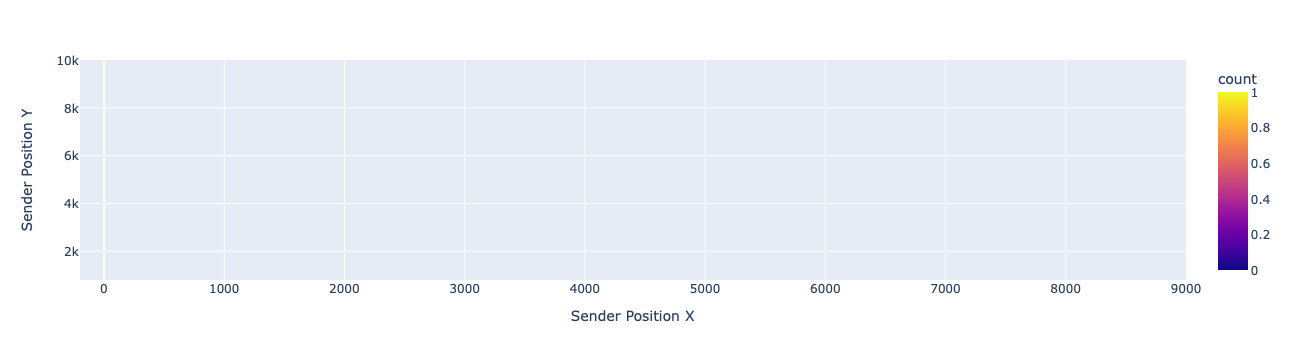

In [40]:
fig = px.density_heatmap(
    df[(df["Nodes"] == 100) & (df["Mode"] == "SF12, 125kHz, 50B")],
    x="Sender Position X",
    y="Sender Position Y",
    range_color=[0,1],
)

fig

**Fig:** The nodes' spatial distribution

In [21]:
rx_counts = df[df["Event"] == "RX"].groupby(["Current Seed", "Nodes", "Frequency", "Mode", 'Messages/Node']).size().reset_index(name='count').set_index(["Current Seed", "Nodes", "Frequency", "Mode", 'Messages/Node'], drop=False)
tx_counts = df[df["Event"] == "TX"].groupby(["Current Seed", "Nodes", "Frequency", "Mode", 'Messages/Node']).size().reset_index(name='count').set_index(["Current Seed", "Nodes", "Frequency", "Mode", 'Messages/Node'], drop=False)
fi_counts = df[df["Event"] == "FI"].groupby(["Current Seed", "Nodes", "Frequency", "Mode", 'Messages/Node']).size().reset_index(name='count').set_index(["Current Seed", "Nodes", "Frequency", "Mode", 'Messages/Node'], drop=False)
fs_counts = df[df["Event"] == "FS"].groupby(["Current Seed", "Nodes", "Frequency", "Mode", 'Messages/Node']).size().reset_index(name='count').set_index(["Current Seed", "Nodes", "Frequency", "Mode", 'Messages/Node'], drop=False)
fw_counts = df[df["Event"] == "FW"].groupby(["Current Seed", "Nodes", "Frequency", "Mode", 'Messages/Node']).size().reset_index(name='count').set_index(["Current Seed", "Nodes", "Frequency", "Mode", 'Messages/Node'], drop=False)


counts = rx_counts.join(tx_counts, lsuffix="_RX", rsuffix="_TX")
counts.drop(["Current Seed_RX", 'Nodes_RX', 'Frequency_RX', 'Mode_RX', 'Messages/Node_RX'], axis='columns', inplace=True)
counts.rename({
    "Current Seed_TX": "Current Seed",
    'Nodes_TX': 'Nodes',
    'Frequency_TX': 'Frequency',
    'Mode_TX': 'Mode',
    'Messages/Node_TX': 'Messages/Node'}, axis='columns', inplace=True)
counts['Penetration (%)'] = (rx_counts["count"] / (tx_counts["count"] * (tx_counts["Nodes"] - 1))) * 100

counts = counts.join(fi_counts, lsuffix="_cnt", rsuffix="_FI")
counts.drop(["Current Seed_cnt", 'Nodes_cnt', 'Frequency_cnt', 'Mode_cnt', 'Messages/Node_cnt'], axis='columns', inplace=True)
counts.rename({
    "Current Seed_FI": "Current Seed",
    'Nodes_FI': 'Nodes',
    'Frequency_FI': 'Frequency',
    'Mode_FI': 'Mode',
    'Messages/Node_FI': 'Messages/Node'}, axis='columns', inplace=True)
counts['Interferences (%)'] = (fi_counts["count"] / (tx_counts["count"] * (tx_counts["Nodes"] - 1))) * 100

counts = counts.join(fs_counts, lsuffix="_cnt", rsuffix="_FS")
counts.drop(["Current Seed_cnt", 'Nodes_cnt', 'Frequency_cnt', 'Mode_cnt', 'Messages/Node_cnt'], axis='columns', inplace=True)
counts.rename({
    "Current Seed_FS": "Current Seed",
    'Nodes_FS': 'Nodes',
    'Frequency_FS': 'Frequency',
    'Mode_FS': 'Mode',
    'Messages/Node_FS': 'Messages/Node'}, axis='columns', inplace=True)
counts['Undersensitivity (%)'] = (fs_counts["count"] / (tx_counts["count"] * (tx_counts["Nodes"] - 1))) * 100

counts = counts.join(fw_counts, lsuffix="_cnt", rsuffix="_FW")
counts.drop(["Current Seed_cnt", 'Nodes_cnt', 'Frequency_cnt', 'Mode_cnt', 'Messages/Node_cnt'], axis='columns', inplace=True)
counts.rename({
    "Current Seed_FW": "Current Seed",
    'Nodes_FW': 'Nodes',
    'Frequency_FW': 'Frequency',
    'Mode_FW': 'Mode',
    'Messages/Node_FW': 'Messages/Node'}, axis='columns', inplace=True)
counts['State Error (%)'] = (fw_counts["count"] / (tx_counts["count"] * (tx_counts["Nodes"] - 1))) * 100

counts['Nodes, Messages/Node'] = counts['Nodes'].astype(str) + ', ' + counts['Messages/Node'].astype(str)

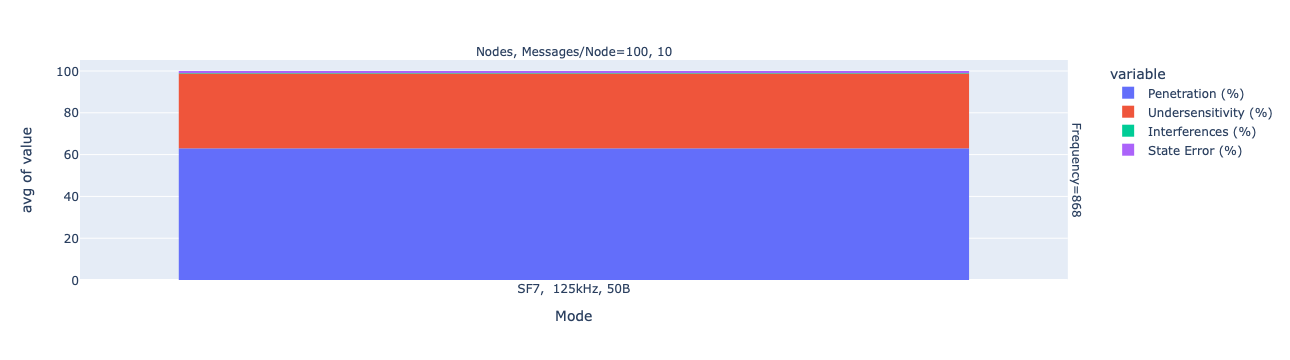

In [22]:
fig = px.histogram(
    counts[~counts["Messages/Node"].isin([1, 20, 30, 40, 60, 70, 80, 90, 100])],
    x="Mode", 
    y=["Penetration (%)", "Undersensitivity (%)", "Interferences (%)", "State Error (%)"],
    facet_col="Nodes, Messages/Node",
    facet_row="Frequency",
    histfunc='avg'
)
fig

**Fig:** Ratio of received frames

In [12]:
means = counts \
    .drop(["Current Seed", "Nodes", "Frequency", "Mode", "Messages/Node"], axis="columns") \
    .reset_index() \
    .groupby(["Nodes", "Frequency", "Mode", "Messages/Node"]) \
    .mean()

means = means[
    (means.index.get_level_values(0) == 100)
    & (means.index.get_level_values(1) == 433)
    & ((means.index.get_level_values(2) == "SF7,  250kHz, 240B") | (means.index.get_level_values(2) == "SF7,  250kHz, 50B"))
]

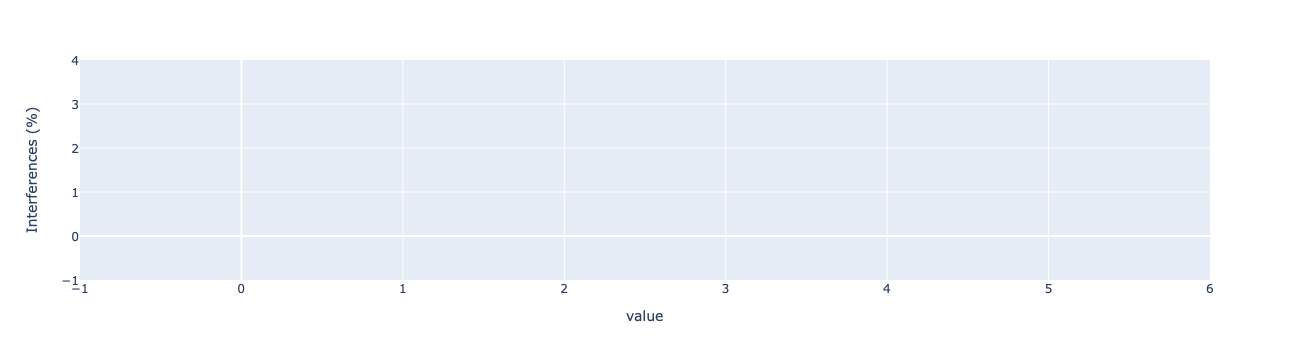

In [13]:
# Do not show penetration but interferences (in %), to show how number of messages affect interferences

fig = px.line(
    means,
    x=means.index.get_level_values(3), #"Messages/Node",
    y="Interferences (%)", 
    color=means.index.get_level_values(2), #"Mode", 
    #facet_col=means.index.get_level_values(1), #"Frequency",
    #line_dash="Penetration (%)",
    labels={
        "x": "Messages/Node",
    #    'facet_col': "Frequency",
        'color': 'Mode',
    #    'line_dash': 'Nodes',
    }
)
fig

In [23]:
sampled_df = df.sample(frac=.05)
sampled_df = sampled_df[~sampled_df["Messages/Node"].isin([1, 20, 30, 40, 60, 70, 80, 90, 100])]
sampled_df['Nodes, Messages/Node'] = sampled_df["Nodes"].astype(str) + ', ' + sampled_df["Messages/Node"].astype(str)

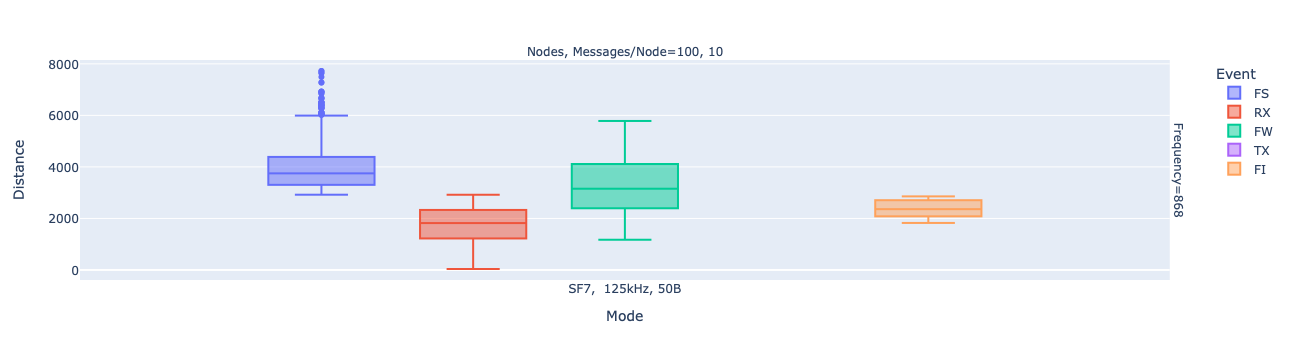

In [24]:
fig = px.box(
    sampled_df,
    x="Mode", 
    y="Distance",
    color="Event",
    facet_col="Nodes, Messages/Node",
    facet_row="Frequency"
)

fig

In [16]:
dist_df = df[(df["Messages/Node"] == 50) & (df["Event"] != "TX") & (df["Frequency"] == 433)].groupby(["Event", "Nodes", "Mode", 'Distance Labels']).size().to_frame()
dist_df[0] = dist_df[0] / 10

In [17]:
fig = px.line(
    dist_df,
    x=dist_df.index.get_level_values(3), # Distance Labels
    y=0,
    facet_col=dist_df.index.get_level_values(2),
    line_dash=dist_df.index.get_level_values(1),
    color=dist_df.index.get_level_values(0),

)

fig

UnboundLocalError: local variable 'fig' referenced before assignment